# Decision Tree And Random Forest

we are using the same Dataset that we have used for Logistic Regression , so that we can contrast DecisionTrees or RandomForest vs LogisticRegression

# Question
The Rain in Australia dataset contains about 10 years of daily weather observations from numerous Australian weather stations. here's a sample from the dataset

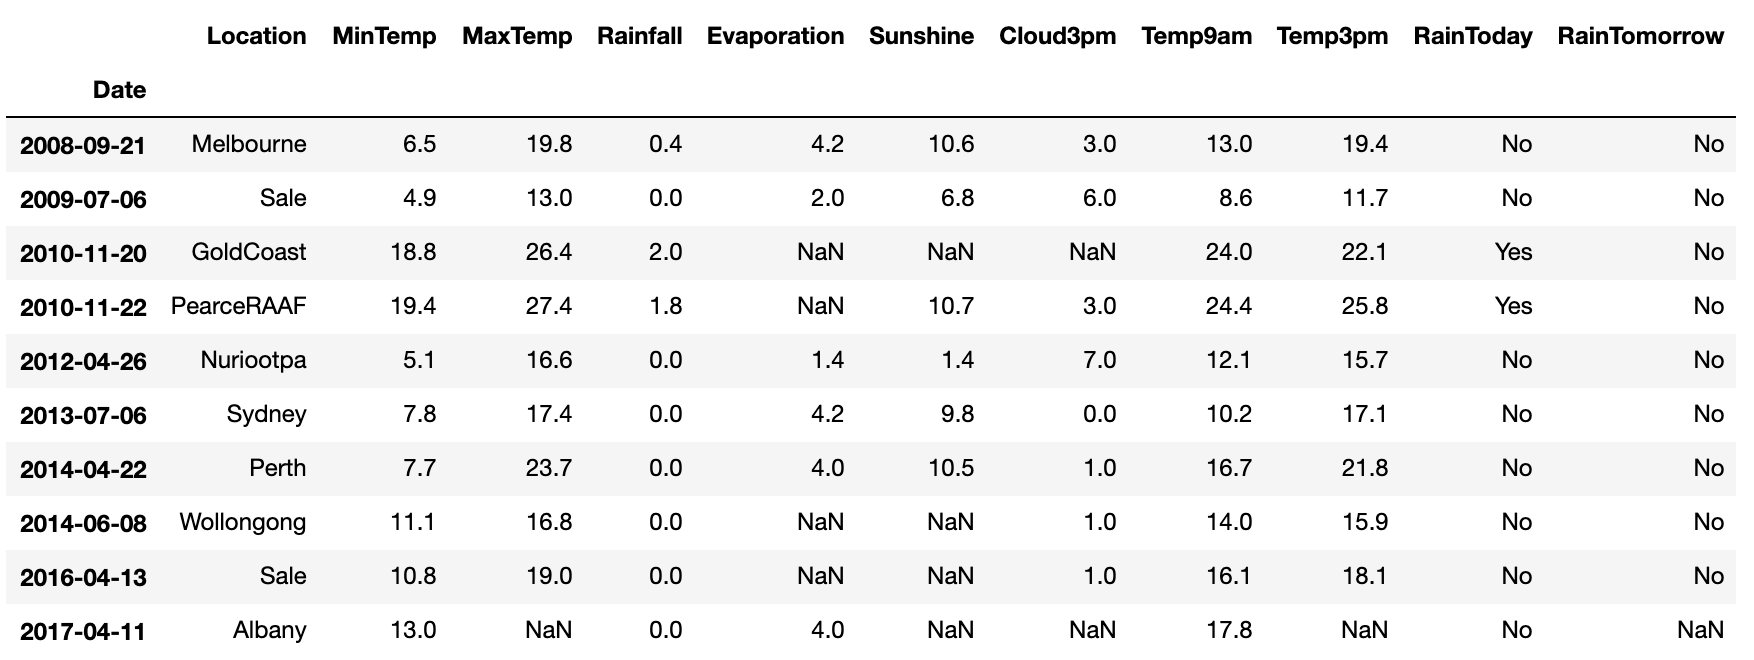

In [2]:
from IPython.display import Image
image_path = "images/SampleDataset.png"
Image(filename=image_path)

#### create a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.

# Solution

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
#matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Data
we  use the opendatasets library to download the data from Kaggle directly within Jupyter.
as we have already downloaded the data while building LogisticRession Model no need to download again here we will directly read the dataset using pandas



In [4]:
import pandas as pd

raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [6]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Data Preprocessing

Since we have thoroughly explored the steps of data preprocessing while constructing the Logistic Regression model, we wont we doing its documentation again. Our primary focus now workings of Decision Trees and RandomForest models.

In [7]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# drop any rows where the value of the target column RainTomorrow is empty.
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

# Create training, validation and test sets
year = pd.to_datetime(raw_df.Date).dt.year
train_df, val_df, test_df = raw_df[year<2015], raw_df[year==2015], raw_df[year>2015]

# Create inputs and targets
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'
X_train, y_train = train_df[input_cols].copy(), train_df[target_col].copy()
X_val, y_val = val_df[input_cols].copy(),  val_df[target_col].copy()
X_test, y_test = test_df[input_cols].copy(), test_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = X_train.select_dtypes('object').columns.tolist()

# Impute missing numerical values
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])
X_train[numeric_cols] = imputer.transform(X_train[numeric_cols])
X_val[numeric_cols] = imputer.transform(X_val[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

# Scaling numeric features
scaler = MinMaxScaler().fit(raw_df[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
X_val[encoded_cols] = encoder.transform(X_val[categorical_cols])
X_test[encoded_cols] = encoder.transform(X_test[categorical_cols])

C:\Users\snikh\AppData\Local\Temp\ipykernel_8804\1714402551.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
C:\Users\snikh\AppData\Local\Temp\ipykernel_8804\1714402551.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
C:\Users\snikh\AppData\Local\Temp\ipykernel_8804\1714402551.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

In [9]:
print('''Divided the Data based on Date Column, 
data till 2014 for the training set, 
data from 2015 for the validation set, 
and the data from 2016 & 2017 for the test set. 
lets see their Shape \n''')

print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

print('\nAfter imputing missing values, Scaling numeric Features, and encoding Categorical Data: ')
print('train_inputs:', X_train.shape)
print('train_targets:', y_train.shape,'\n')
print('val_inputs:', X_val.shape)
print('val_targets:', y_val.shape,'\n')
print('test_inputs:', X_test.shape)
print('test_targets:', y_test.shape)

Divided the Data based on Date Column, 
data till 2014 for the training set, 
data from 2015 for the validation set, 
and the data from 2016 & 2017 for the test set. 
lets see their Shape 

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)

After imputing missing values, Scaling numeric Features, and encoding Categorical Data: 
train_inputs: (98988, 124)
train_targets: (98988,) 

val_inputs: (17231, 124)
val_targets: (17231,) 

test_inputs: (25974, 124)
test_targets: (25974,)


#### As a final step, dropping the textual categorical columns, so that we will left with just numeric data.


In [10]:
X_train_data = X_train[numeric_cols + encoded_cols]
X_val_data = X_val[numeric_cols + encoded_cols]
X_test_data = X_test[numeric_cols + encoded_cols]

In [11]:
print('train_inputs:', X_train_data.shape)
print('train_targets:', y_train.shape,'\n')
print('val_inputs:', X_val_data.shape)
print('val_targets:', y_val.shape,'\n')
print('test_inputs:', X_test_data.shape)
print('test_targets:', y_test.shape)

train_inputs: (98988, 118)
train_targets: (98988,) 

val_inputs: (17231, 118)
val_targets: (17231,) 

test_inputs: (25974, 118)
test_targets: (25974,)


# Training and Visualizing Decision Trees

## Decision Tree

A decision tree in general parlance represents a hierarchical series of binary decisions:



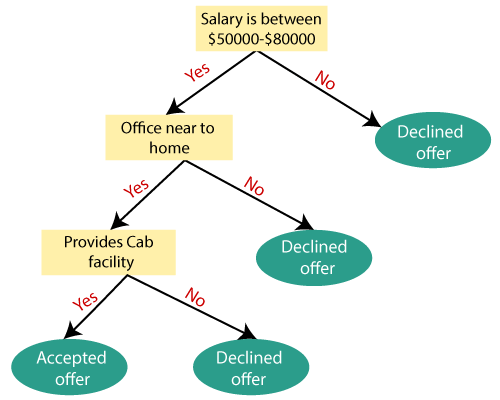

In [13]:
from IPython.display import Image
Image(filename='Images/DT.png')

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

## Training

We can use DecisionTreeClassifier from sklearn.tree to train a decision tree.


In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
model = DecisionTreeClassifier(random_state=42)

In [16]:
model.fit(X_train_data, y_train)

DecisionTreeClassifier(random_state=42)

An optimal decision tree has now been created using the training data.


## Evaluation

Let's evaluate the decision tree using the accuracy score.



In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
train_preds = model.predict(X_train_data)

In [19]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [20]:
y_train

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

In [21]:
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

In [22]:
# The decision tree also returns probabilities for each prediction.
train_probs = model.predict_proba(X_train_data)

In [23]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Seems like the decision tree is quite confident about its predictions.

Let's check the accuracy of its predictions.

In [24]:
accuracy_score(y_train,train_preds)

0.9999797955307714

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.


We can make predictions and compute accuracy in one step using model.score


In [25]:
model.score(X_val_data, y_val)

0.7915965411177529

Although the training accuracy is 100%, the accuracy on the validation set is just about 79%, which is only marginally better then always predicting "No".

In [26]:
y_val.value_counts() / len(y_val)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

## Visualization

We can visualize the decision tree learned from the training data.


In [27]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

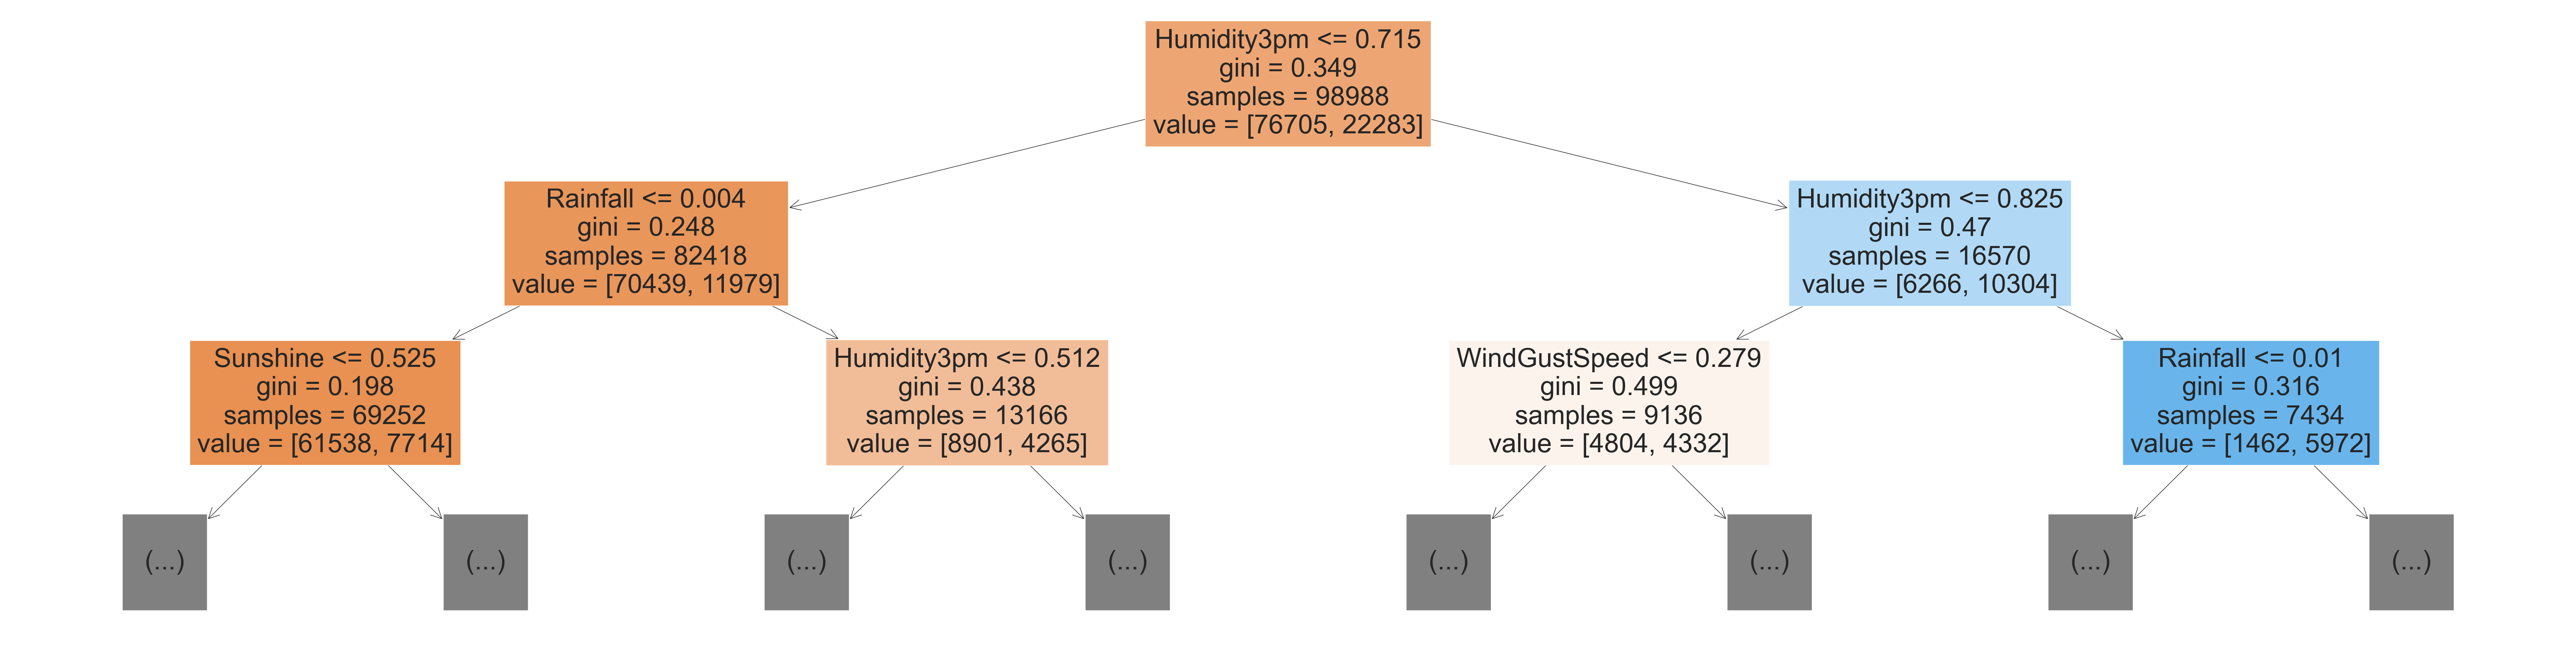

In [28]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train_data.columns, max_depth=2, filled=True )

As we can see how the model classifies a given input as a series of decisions. The tree is truncated here, but following any path from the root node down to a leaf will result in "Yes" or "No

#### No let's understand How a Decision Tree is Created :


as we can see gini value in each box. This is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0

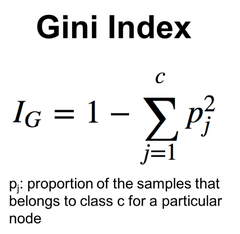

In [29]:
Image(filename='Images/gini.png')

Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one. Then, it recursively performs an optimal split for the two portions. In practice, however, it's very inefficient to check all possible splits, so the model uses a heuristic (predefined strategy) combined with some randomization.

The iterative approach of the machine learning workflow in the case of a decision tree involves growing the tree layer-by-layer:

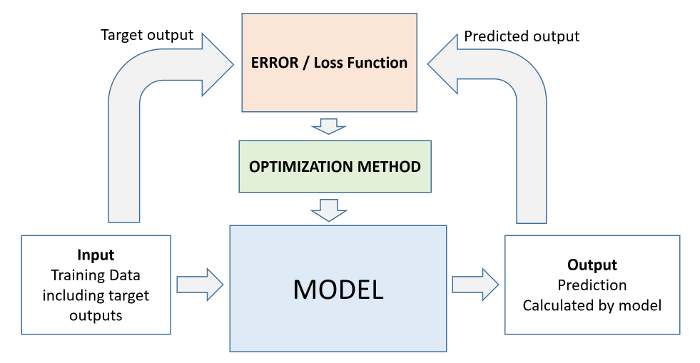

In [30]:
Image(filename='Images/MLWorkFlow.png')

In [33]:
# Let's check the depth of the tree that was created.
model.tree_.max_depth

45

In [34]:
# We can also display the tree as text, which can be easier to follow for deeper trees.

tree_text = export_text(model, max_depth=10, feature_names=list(X_train_data.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

## Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [35]:
X_train_data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=118)

In [36]:
model.feature_importances_

array([3.89966528e-02, 3.98782011e-02, 5.96427757e-02, 2.36773198e-02,
       5.07043051e-02, 5.65829728e-02, 2.84210487e-02, 3.18118006e-02,
       4.15584777e-02, 2.61768551e-01, 3.48260134e-02, 6.17311498e-02,
       1.30810157e-02, 1.87706189e-02, 3.77266416e-02, 2.04277295e-03,
       1.97726912e-03, 1.29442781e-03, 7.22914582e-04, 1.41159672e-03,
       1.13142956e-03, 8.84987083e-04, 1.91986005e-03, 1.28832986e-03,
       1.66479404e-03, 1.02031459e-03, 2.32772135e-03, 1.92892660e-03,
       2.06742405e-04, 9.86492910e-04, 1.42432545e-03, 4.56421695e-04,
       8.23530902e-04, 1.83872374e-03, 1.11862633e-03, 9.32614661e-04,
       9.48690980e-04, 2.27934031e-03, 1.57447845e-03, 3.90105338e-04,
       6.30019928e-04, 1.21446612e-03, 1.46143798e-03, 1.24663727e-03,
       9.28765978e-04, 8.74705827e-04, 1.58370379e-03, 1.22063934e-03,
       1.66598869e-03, 6.32595896e-04, 1.87655290e-03, 1.04211111e-03,
       1.38182438e-03, 1.53795897e-03, 6.53950775e-04, 1.22808456e-03,
      

Let's turn this into a dataframe and visualize the most important features.


In [37]:
importance_df = pd.DataFrame({
    'feature': X_train_data.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261769
11,Pressure3pm,0.061731
2,Rainfall,0.059643
5,WindGustSpeed,0.056583
4,Sunshine,0.050704
8,Humidity9am,0.041558
1,MaxTemp,0.039878
0,MinTemp,0.038997
14,Temp9am,0.037727
10,Pressure9am,0.034826


<AxesSubplot: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

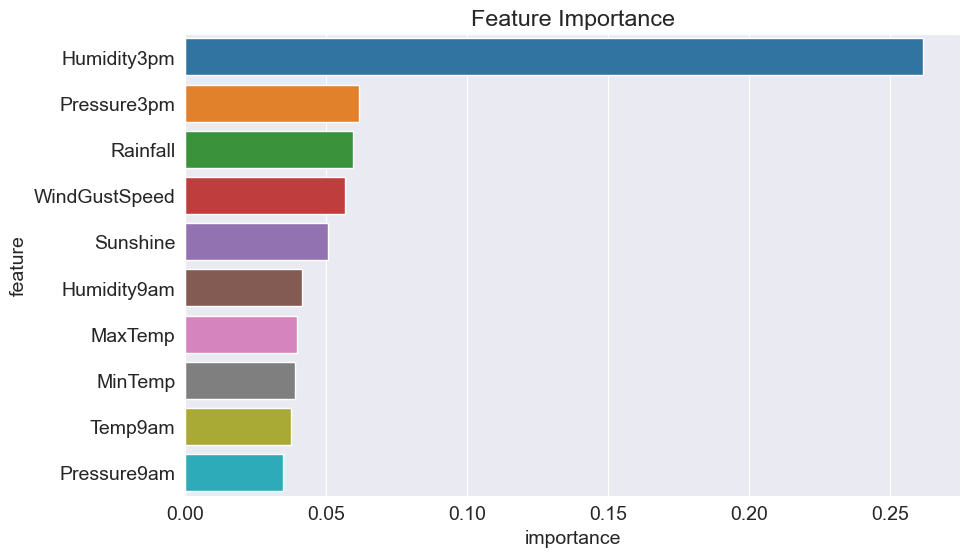

In [38]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y ='feature')

## Hyperparameter Tuning and Overfitting


As we saw , our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, now we'll look at some strategies for reducing overfitting.

The process of reducing overfitting is known as regularization.

#### parameters - something that model figures out like- weights of the different feature, in DT which column is the root node, on what point we are splitting at

#### hyperparameters - things that we have to set upfront for regularization ,to improve model accuracy

In [58]:
DecisionTreeClassifier()

DecisionTreeClassifier()

The DecisionTreeClassifier accepts several arguments, some of which can be modified to reduce overfitting.

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are learned from the data.) We'll explore a couple of hyperparameters:

* max_depth
* max_leaf_nodes


### max_depth
By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [39]:
model.tree_.max_depth

45

In [40]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [41]:
model.fit(X_train_data,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [42]:
# We can compute the accuracy of the model on the training and validation sets using model.score

model.score(X_train_data, y_train)

0.8291308037337859

In [43]:
model.score(X_val_data,y_val)

0.8334397307178921

Great, while the training accuracy of the model has gone down, the validation accuracy of the model has increased significantly.

In [64]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]\nclass = No'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]\ncla

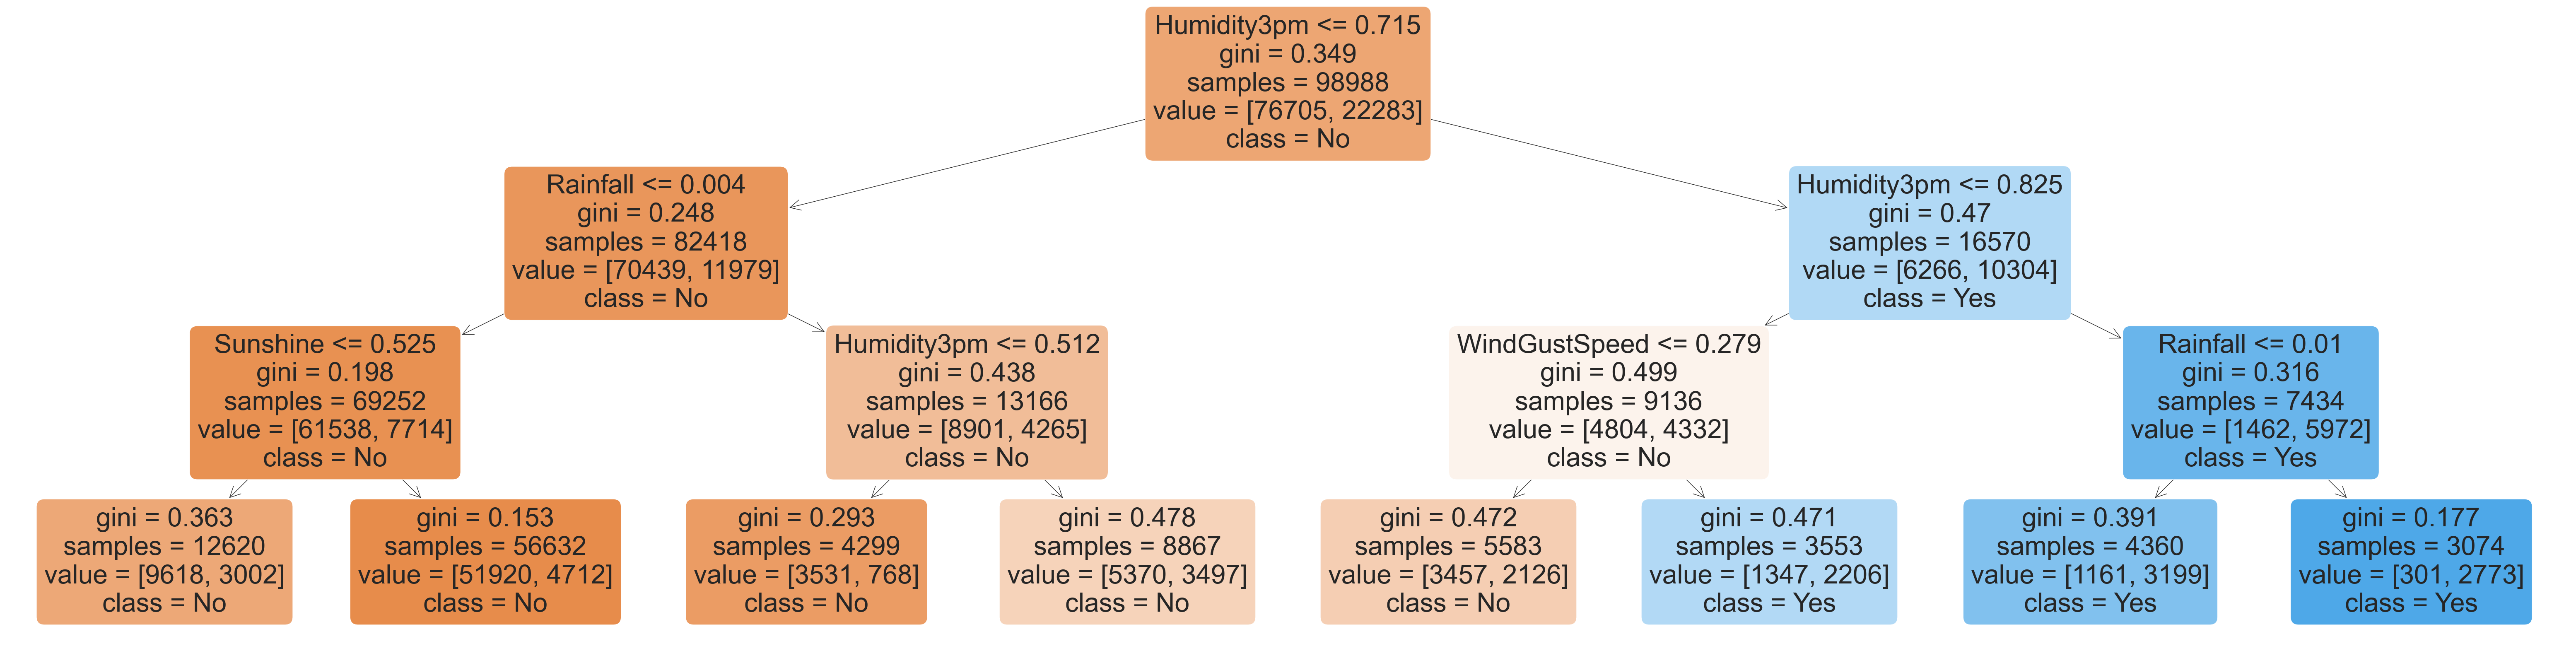

In [44]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train_data.columns, filled=True, rounded=True, class_names=model.classes_)

In [45]:
print(export_text(model, feature_names=list(X_train_data.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [46]:
# Let's experiment with different depths using a helper function.
def max_depth_error(max_d):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train_data, y_train)
    train_error = 1 - model.score(X_train_data, y_train)
    val_error = 1 - model.score(X_val_data, y_val)
    return {'Max Depth ': max_d, "Training Error": train_error, "Validation Error": val_error}
    


In [47]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

In [48]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153190,0.154779
7,8,0.147553,0.157449
8,9,0.141017,0.156404
9,10,0.133572,0.157275


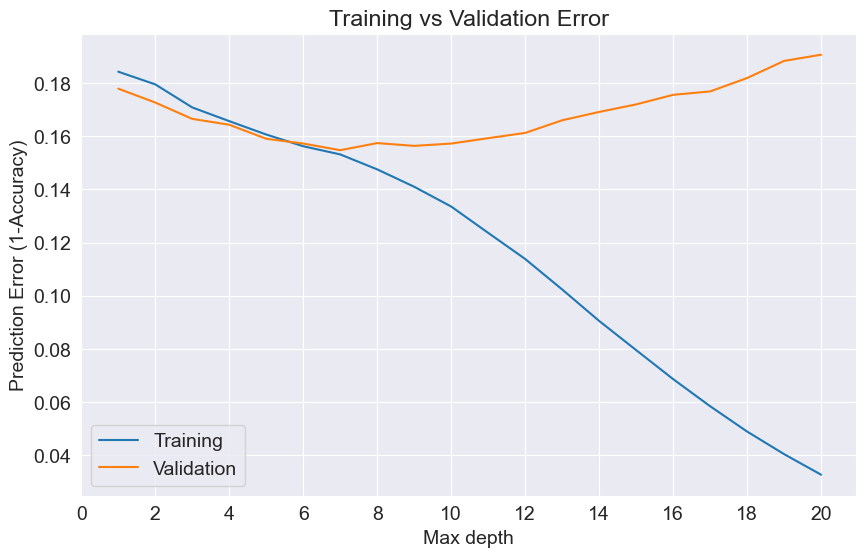

In [49]:
plt.figure()
plt.plot(errors_df['Max Depth '], errors_df['Training Error'])
plt.plot(errors_df['Max Depth '], errors_df['Validation Error'])
plt.title("Training vs Validation Error")
plt.xticks(range(0,21,2))
plt.xlabel('Max depth')
plt.ylabel('Prediction Error (1-Accuracy)')
plt.legend(['Training', 'Validation'])
plt.show()

This is a common pattern we will get to see with all machine learning algorithms:



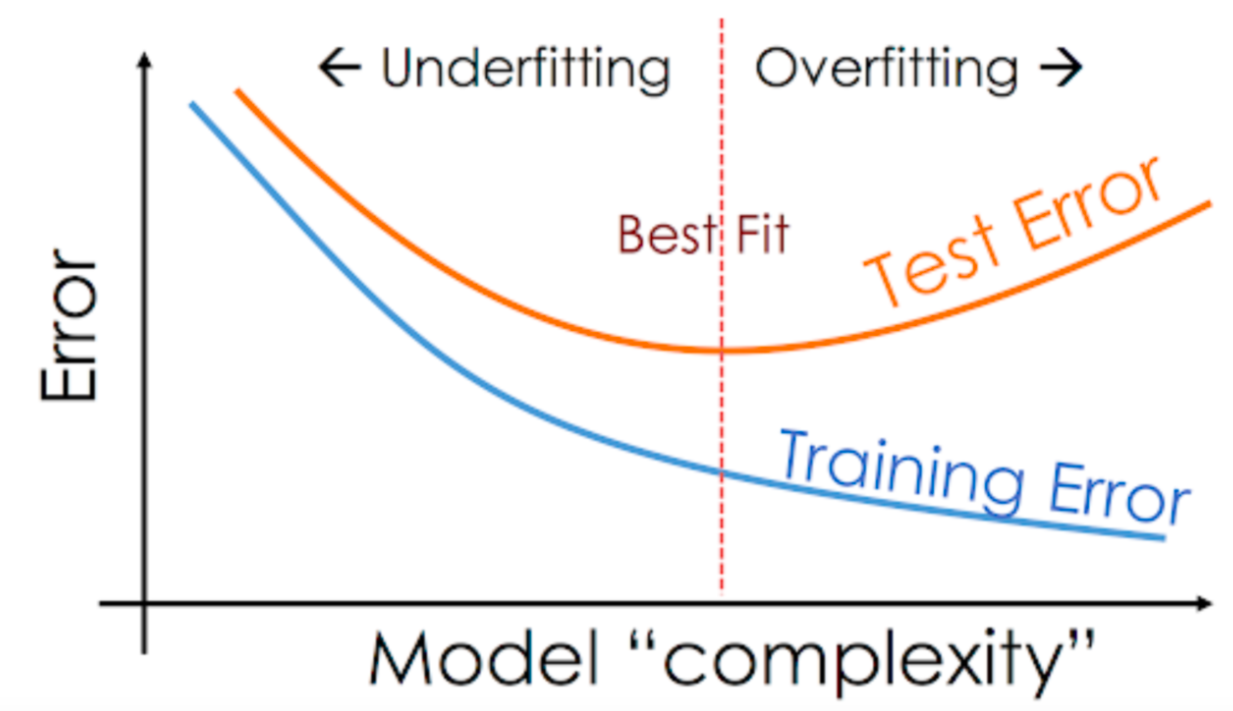

In [50]:
Image(filename='Images/overfitting.png')

In [51]:
# From above , it appears that a maximum depth of 7; results in the lowest 
# validation error.

model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train_data, y_train)
model.score(X_train_data, y_train)

0.8468097143088051

In [52]:
model.score(X_val_data, y_val)

0.8452208229354071

### max_leaf_nodes

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.

In [82]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
model.fit(X_train_data, y_train)
model.score(X_train_data, y_train)


0.8479714712894493

In [83]:
model.score(X_val_data, y_val)

0.8451627879983751

In [84]:
model.tree_.max_depth

12

#### As we can notice that the model was able to achieve a greater depth of 12 for certain paths while keeping other paths shorter.


# Training a Random Forest

## Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model.

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crow.":

A random forest works by averaging/combining the results of several decision trees:



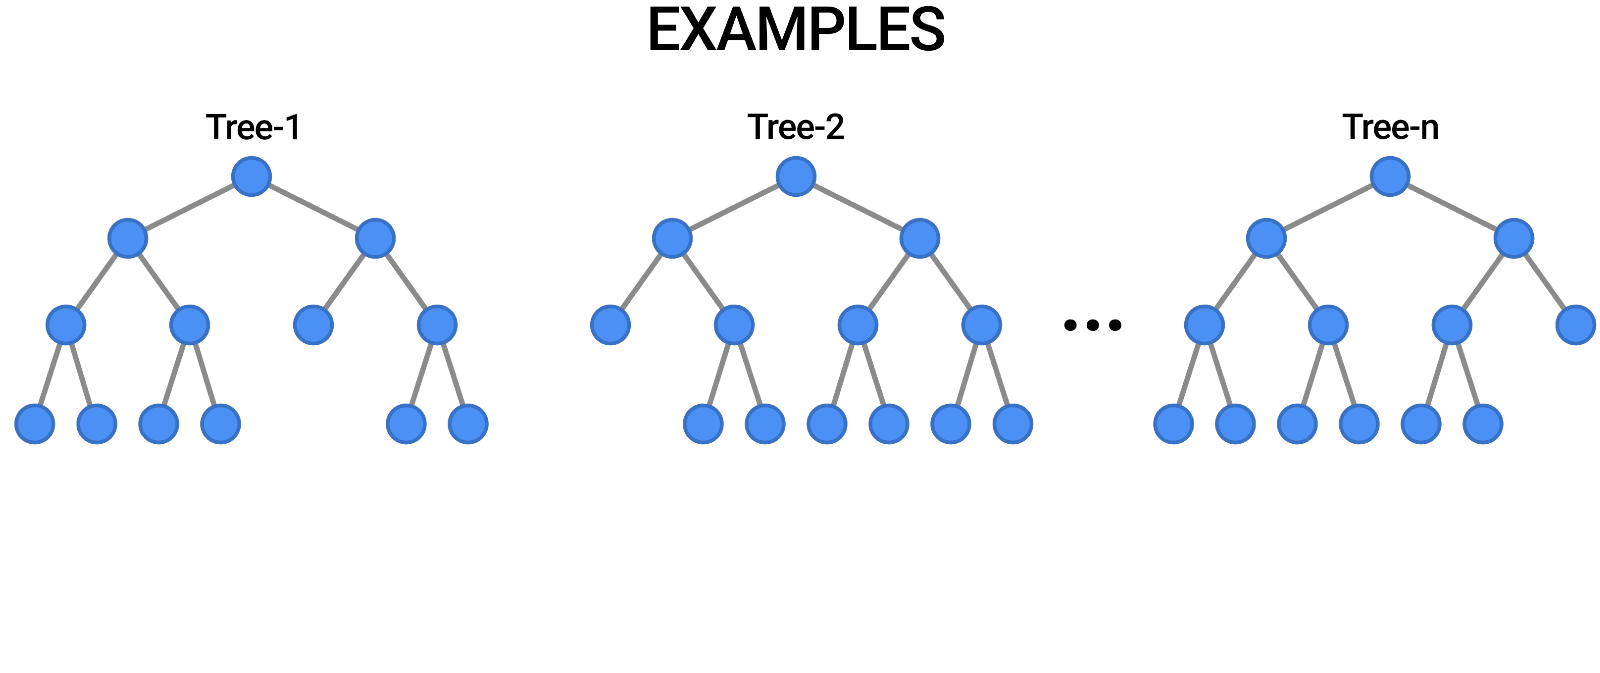

In [53]:
Image(filename='Images/randomforest.gif')

In [54]:
# We'll use the RandomForestClassifier class from sklearn.ensemble.
from sklearn.ensemble import RandomForestClassifier


In [55]:
%%time
model = RandomForestClassifier(n_jobs=-1, random_state=42)

CPU times: total: 0 ns
Wall time: 0 ns


n_jobs allows the random forest to use mutiple parallel workers to train decision trees, and random_state=42 ensures that the we get the same results for each execution.

In [11]:
%%time
model.fit(X_train_data, y_train)

CPU times: total: 49.2 s
Wall time: 7.44 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [93]:
model.score(X_train_data, y_train)

0.9999494888269285

In [94]:
model.score(X_val_data, y_val)

0.856363530845569

Once again, the training accuracy is almost 100%, but this time the validation accuracy is much better. In fact, it is better than the best single decision tree we had trained so far. This is the power of Random Forests.

This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging. Here's what it looks like visual:ly

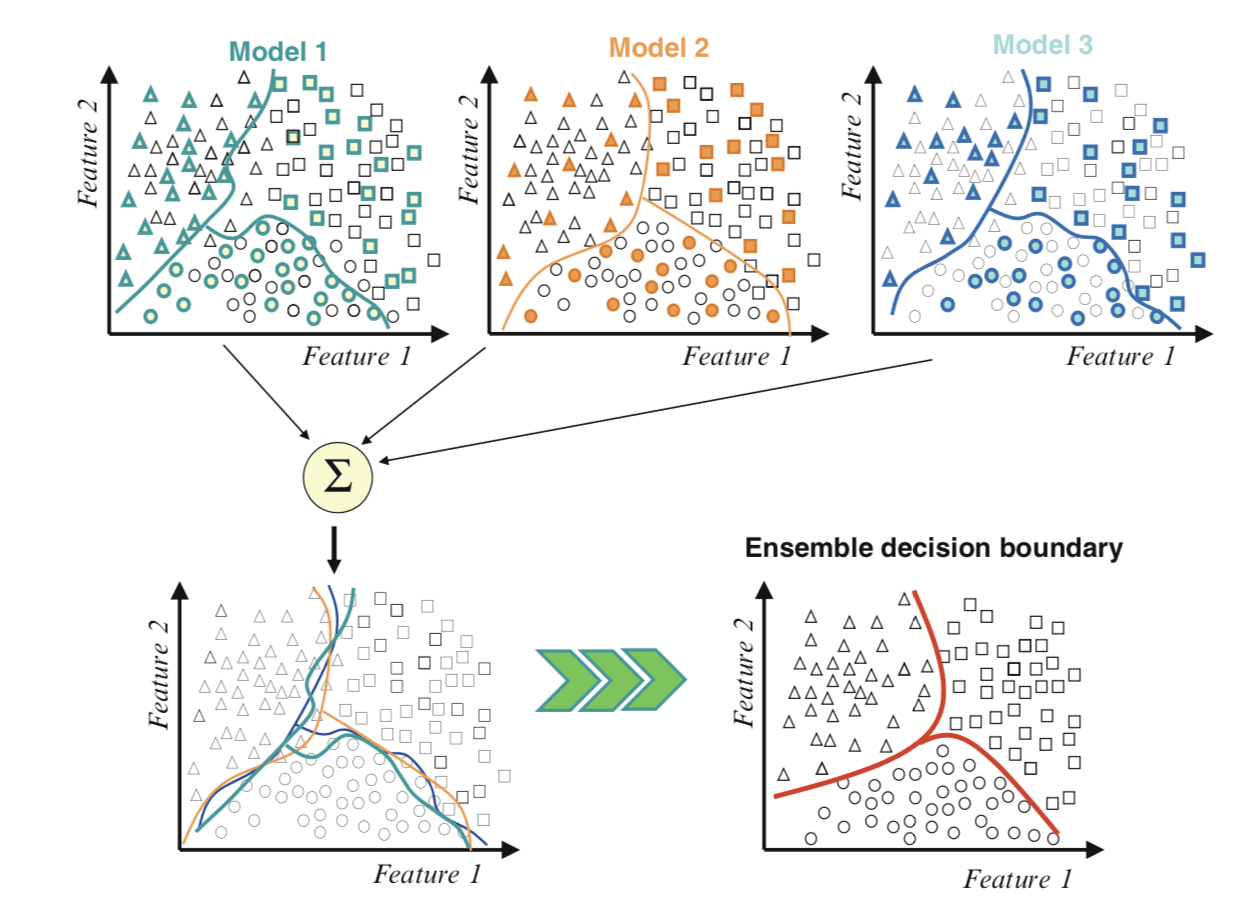

In [56]:
Image(filename='Images/ensembling.png')

In [96]:
# We can also look at the probabilities for the predictions.

train_probs = model.predict_proba(X_train_data)
train_probs

array([[0.94, 0.06],
       [0.97, 0.03],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.95, 0.05]])

In [101]:
train_preds = model.predict(X_train_data)

In [102]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

## Feature Importance

Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [103]:
importance_df = pd.DataFrame({
    'feature': X_train_data.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [104]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.138769
4,Sunshine,0.059365
11,Pressure3pm,0.052724
10,Pressure9am,0.050350
5,WindGustSpeed,0.049686
8,Humidity9am,0.049584
2,Rainfall,0.048554
1,MaxTemp,0.047725
0,MinTemp,0.043348
14,Temp9am,0.040813


<AxesSubplot: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

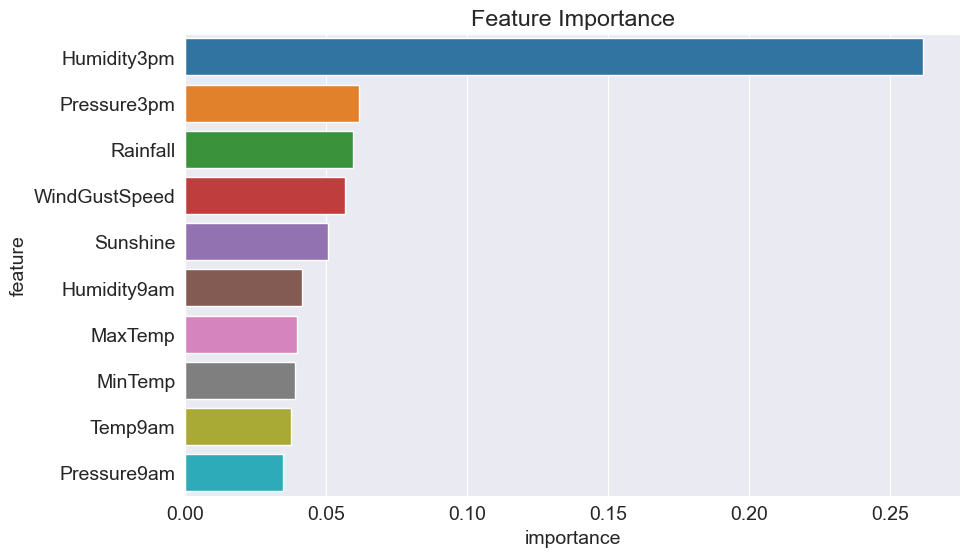

In [57]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

## Hyperparameter Tuning with Random Forests


Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees.

* n_estimators
* max_depth and max_leaf_nodes
* max_features
* min_samples_split and min_samples_leaf

In [106]:
RandomForestClassifier()

RandomForestClassifier()

In [58]:
# Let's create a base model with which we can compare models with tuned hyperparameters.

base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train_data, y_train)
base_accs = base_model.score(X_train_data, y_train), base_model.score(X_val_data, y_val)

base_accs  # We can use this as a benchmark for hyperparmeter tuning.


(0.9999494888269285, 0.856363530845569)

### n_estimators

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed.

#### 10 estimators

In [13]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10).fit(X_train_data, y_train)
model.score(X_train_data, y_train), model.score(X_val_data, y_val)

(0.9875338424859579, 0.8455690325575996)

In [109]:
base_accs

(0.9999494888269285, 0.856363530845569)

#### 500 estimators

In [14]:
model = RandomForestClassifier(random_state=42,n_jobs=-1, n_estimators = 500).fit(X_train_data, y_train)
model.score(X_train_data, y_train), model.score(X_val_data, y_val)

(0.9999797955307714, 0.8576402994602751)

### max_depth and max_leaf_nodes

These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a max_depth to reduce overfitting

Let's define a helper function test_params to make it easy to test hyperparameters.


In [15]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train_data,y_train)
    return model.score(X_train_data, y_train), model.score(X_val_data, y_val)



In [16]:
test_params(max_depth=5)

(0.8208469713500627, 0.82589518890372)

In [17]:
test_params(max_depth=26)

(0.9795833838445064, 0.856363530845569)

In [21]:
test_params(max_depth=26, max_leaf_nodes=2**10)

(0.8777730634016244, 0.8506180720793918)

In [24]:
test_params(max_depth=26)

(0.9795833838445064, 0.856363530845569)

In [20]:
base_accs

(0.9999494888269285, 0.856363530845569)

### max_features

Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split

Notice that the default value auto causes only (sqrt(n)) out of total features(n) to be chosen randomly at each split. This is the reason each decision tree in the forest is different. While it may seem counterintuitive, choosing all features for every split of every tree will lead to identical trees, so the random forest will not generalize well.

In [25]:
test_params(max_features='log2')

(0.9999494888269285, 0.8565376356566653)

In [26]:
base_accs

(0.9999494888269285, 0.856363530845569)

In [31]:
test_params(max_features=25)

(0.9999393865923142, 0.8577563693343393)

### min_samples_split and min_samples_leaf

min_samples_split = minimum size or minimum no of rows for splitting a node 

min_samples_leaf = minimum no of rows for leaf node to be created

By default, the decision tree classifier tries to split every node that has 2 or more. and leaf size default value is 1 we can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [41]:
test_params(min_samples_split =15, min_samples_leaf=10)

(0.8772275427324524, 0.8533457141199002)

### min_impurity_decrease

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.

In [42]:
test_params(min_impurity_decrease=1e-6)

(0.9875843536590294, 0.8573501247751146)

In [45]:
base_accs

(0.9999494888269285, 0.856363530845569)

### bootstrap, max_samples

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of the training set, and some rows randomly get higher weightage than others.

In [46]:
# if set False every DT will be trained using the entire dataset, 
# which is one copy of each row.

test_params(bootstrap=False)

(0.9999797955307714, 0.8564215657826011)

In [47]:
base_accs

(0.9999494888269285, 0.856363530845569)

In [52]:
test_params(max_samples=0.9)

(0.9998181597769427, 0.8566537055307295)

### class_weight

In [59]:
y_train.value_counts() #/ len(y_train)

No     76705
Yes    22283
Name: RainTomorrow, dtype: int64

In [58]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [60]:
test_params(class_weight='balanced')

(0.9999393865923142, 0.8550287272938308)

In [61]:
test_params(class_weight={'No':1, 'Yes':2})

(0.9999393865923142, 0.85694388021589)

## Putting it together


In [59]:
model = RandomForestClassifier(random_state=42,
                              n_jobs=-1,
                              n_estimators=500,
                              max_features=7,
                              max_depth=30,
                              class_weight={'No':1, 'Yes':1.5})

In [60]:
model.fit(X_train_data, y_train)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [62]:
model.score(X_train_data, y_train), model.score(X_val_data, y_val)

(0.9904230815856467, 0.8571179850269862)

In [62]:
base_accs

(0.9999494888269285, 0.856363530845569)

#### We've increased the accuracy from 84.5% with a single decision tree to 85.7% with a well-tuned random forest. 

Depending on the dataset and the kind of problem, you may or may not  see a significant improvement with hyperparameter tuning.
This could be due to any of the following reasons:
* We may not have found the right mix of hyperparameters to regularize (reduce overfitting) the model properly, and we should keep trying to improve the model.
* We may have reached the limits of the modeling technique we're currently using (Random Forests), and we should try another modeling technique e.g. gradient boosting.
* We may have reached the limits of what we can predict using the given amount of data, and we may need more data to improve the model.
* We may have reached the limits of how well we can predict whether it will rain tomorrow using the given weather measurements, and we may need more features (columns) to further improve the model. In many cases, we can also generate new features using existing features (this is called feature engineering).
* Whether it will rain tomorrow may be an inherently random or chaotic phenomenon which simply cannot be predicted beyond a certain accuracy any amount of data for any number of weather measurements with any modeling technique.

Remember that ultimately all models are wrong, but some are useful. If you can rely on the model we've created today to make a travel decision for tomorrow, then the model is useful, even though it may sometimes be wrongest set :


### Strategy for Tuning Hyperparameters:

* Tune the most important/impactful hyperparameter first e.g. n_estimators.
* With the best value of the first hyperparameter, tune the next most impactful hyperparameter.
* And so on, keep training the next most impactful parameters with the best values for previous parameters...

Your first objective should be make the training loss as low as possible (even if the validation loss is very large), and then try to regularize the model to slowly decrease the valiadation loss while increasing the training loss.





### Finally, let's also compute the accuracy of our model on the test set :

In [63]:
model.score(X_test_data, y_test)

0.8448063448063448

As we can notice that the test accuracy is slightly lower



## Making Predictions on New Inputs


In [64]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols+encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [65]:
new_input = {'Date': '2024-01-26',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [66]:
predict_input(model, new_input)

C:\Users\snikh\AppData\Local\Temp\ipykernel_8804\2223698210.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
C:\Users\snikh\AppData\Local\Temp\ipykernel_8804\2223698210.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
C:\Users\snikh\AppData\Local\Temp\ipykernel_8804\2223698210.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

('Yes', 0.7863563377801437)

## Saving and Loading Trained Models


In [67]:
import joblib

In [68]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [69]:
joblib.dump(aussie_rain, 'aussi_rain_rf.joblib')

['aussi_rain_rf.joblib']

The object can be loaded back using joblib.load


# Summary

* Downloading a real-world dataset.
* Preparing a dataset for training.
* Training and interpreting decision trees.
* Training and interpreting random forests.
* Overfitting & hyperparameter tuning.
* Making predictions on single inputs.
* Saving a model to disk.






## Revision Questions* What is a decision tree model?
* What is DecisionTreeClassifier()?
* Can we use decision tree only for Classifier?
* How can you visualize the decision tree?
* What is max_depth in decision tree?
* What is gini index?
* What is feature importance?
* What is overfitting? What could be the reason for overfitting?
* What is hyperparameter tuning?
* What is one way to control the complexity of the decision tree?
* What is a random forest model?
* What is RandomForestClassifier()?
* What is model.score()?
* What is generalization?
* What is ensembling?
* What is n_estimators in hyperparameter tuning of random forests?
* What is underfitting?
* What does max_features parameter do?
* What are some features that help in controlling the threshold for splitting nodes in decision tree?
* What is bootstrapping? What is max_samples parameter in bootstrapping?
* What is class_weight parameter?
* You may or may not a see a significant improvement in the accuracy score with hyperparameter tuning. What could be the possible reasons for that?
ble reasons for that?
